<a href="https://colab.research.google.com/github/RecursiveOuroboros/DS-Unit-1-Sprint-1-Dealing-With-Data/blob/master/High_Elipitcal_Orbit_Sat_Data_IoT_Telementary_Predictive_Maitenance_Jason_Meil_DS3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# Importing Appropriate Libraries
import random
import seaborn as sns
import numpy as np
import sklearn as skl
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler 
from sklearn.cluster import KMeans
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import pandas as pd
import matplotlib.pyplot as plt

In [0]:
# Importing the DataSet
data = pd.read_csv('http://aws-proserve-data-science.s3.amazonaws.com/device_failure.csv', encoding='latin1')

In [4]:
data.head(10)

,date,device,failure,attribute1,attribute2,attribute3,attribute4,attribute5,attribute6,attribute7,attribute8,attribute9
0,2015-01-01,S1F01085,0,215630672,56,0,52,6,407438,0,0,7
1,2015-01-01,S1F0166B,0,61370680,0,3,0,6,403174,0,0,0
2,2015-01-01,S1F01E6Y,0,173295968,0,0,0,12,237394,0,0,0
3,2015-01-01,S1F01JE0,0,79694024,0,0,0,6,410186,0,0,0
4,2015-01-01,S1F01R2B,0,135970480,0,0,0,15,313173,0,0,3
5,2015-01-01,S1F01TD5,0,68837488,0,0,41,6,413535,0,0,1
6,2015-01-01,S1F01XDJ,0,227721632,0,0,0,8,402525,0,0,0
7,2015-01-01,S1F023H2,0,141503600,0,0,1,19,494462,16,16,3
8,2015-01-01,S1F02A0J,0,8217840,0,1,0,14,311869,0,0,0
9,2015-01-01,S1F02DZ2,0,116440096,0,323,9,9,407905,0,0,164


In [5]:
#exporing data types and looking for null values
data.dtypes

date          object
device        object
failure        int64
attribute1     int64
attribute2     int64
attribute3     int64
attribute4     int64
attribute5     int64
attribute6     int64
attribute7     int64
attribute8     int64
attribute9     int64
dtype: object

In [6]:
data.isnull()

,date,device,failure,attribute1,attribute2,attribute3,attribute4,attribute5,attribute6,attribute7,attribute8,attribute9
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False,False,False


In [7]:
data['failure'].value_counts()


0    124388
1       106
Name: failure, dtype: int64

In [0]:
# Dropping uncessecary data
data_2 = data.drop(columns=['device', 'date'])

In [9]:
data_2.columns

Index(['failure', 'attribute1', 'attribute2', 'attribute3', 'attribute4',
       'attribute5', 'attribute6', 'attribute7', 'attribute8', 'attribute9'],
      dtype='object')

In [10]:
data_2.groupby('failure').count()

,attribute1,attribute2,attribute3,attribute4,attribute5,attribute6,attribute7,attribute8,attribute9
failure,,,,,,,,,
0,124388,124388,124388,124388,124388,124388,124388,124388,124388
1,106,106,106,106,106,106,106,106,106


In [0]:
sns.set()

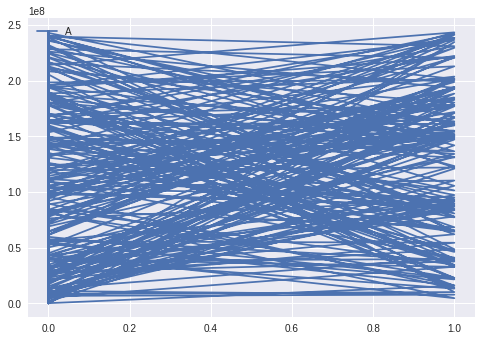

In [21]:
# same plotting code as above!
x = data_2['failure']
y = data_2['attribute1']
plt.plot(x, y)
plt.legend('ABCDEF', ncol=2, loc='upper left');

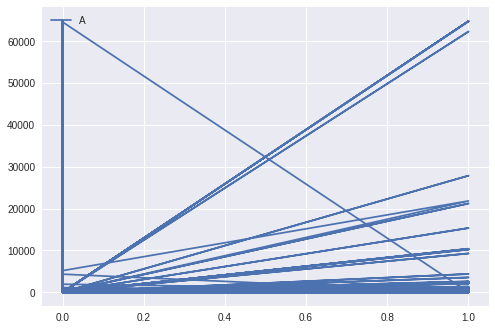

In [22]:
# same plotting code as above!
x = data_2['failure']
y = data_2['attribute2']
plt.plot(x, y)
plt.legend('ABCDEF', ncol=2, loc='upper left');

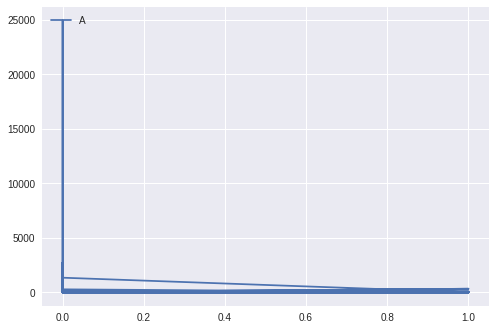

In [23]:
# same plotting code as above!
x = data_2['failure']
y = data_2['attribute3']
plt.plot(x, y)
plt.legend('ABCDEF', ncol=2, loc='upper left');

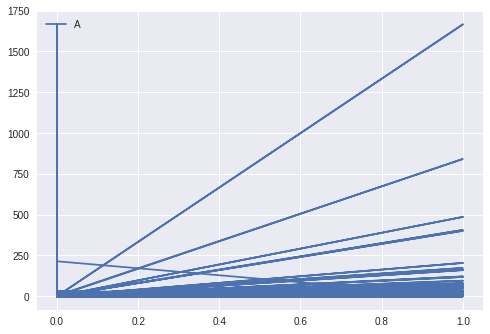

In [24]:
# same plotting code as above!
x = data_2['failure']
y = data_2['attribute4']
plt.plot(x, y)
plt.legend('ABCDEF', ncol=2, loc='upper left');

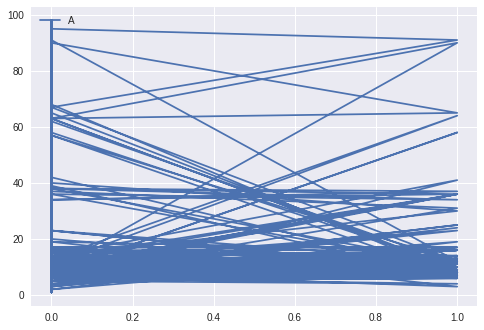

In [25]:
# same plotting code as above!
x = data_2['failure']
y = data_2['attribute5']
plt.plot(x, y)
plt.legend('ABCDEF', ncol=2, loc='upper left');

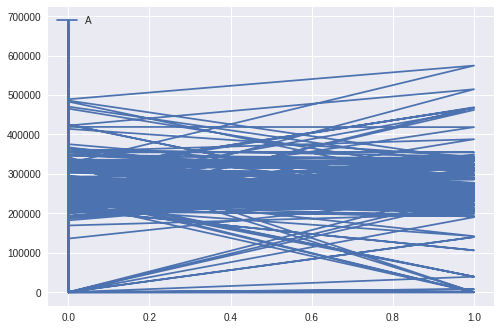

In [26]:
# same plotting code as above!
x = data_2['failure']
y = data_2['attribute6']
plt.plot(x, y)
plt.legend('ABCDEF', ncol=2, loc='upper left');

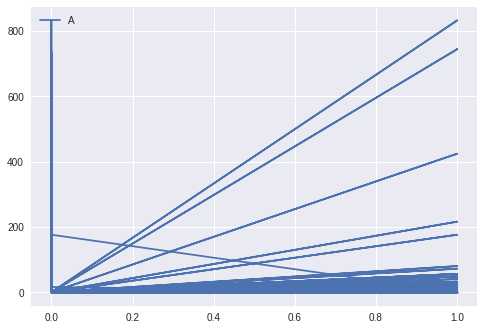

In [27]:
# same plotting code as above!
x = data_2['failure']
y = data_2['attribute7']
plt.plot(x, y)
plt.legend('ABCDEF', ncol=2, loc='upper left');

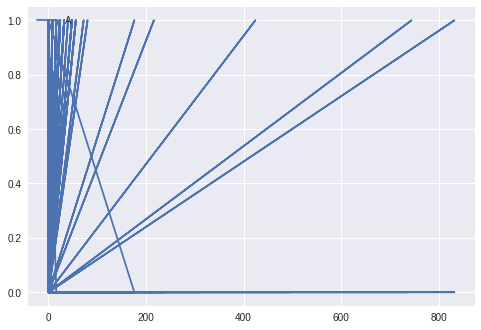

In [29]:
# same plotting code as above!
x = data_2['attribute8']
y = data_2['failure']
plt.plot(x, y)
plt.legend('ABCDEF', ncol=2, loc='upper left');

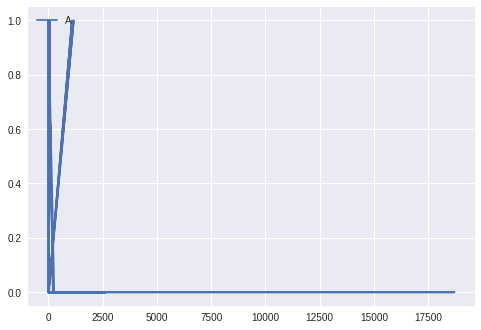

In [30]:
# same plotting code as above!
x = data_2['attribute9']
y = data_2['failure']
plt.plot(x, y)
plt.legend('ABCDEF', ncol=2, loc='upper left');

In [32]:
# Synthetic Minority Oversampling Algorithm
X = data_2.loc[:, data_2.columns != 'failure']
y = data_2.loc[:, data_2.columns == 'failure']
from imblearn.over_sampling import SMOTE
os = SMOTE(random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=30)
columns = X_train.columns
os_data_X,os_data_y=os.fit_sample(X_train, y_train)
os_data_X = pd.DataFrame(data=os_data_X,columns=columns )
os_data_y= pd.DataFrame(data=os_data_y,columns=['y'])
# we can Check the numbers of our data
print("length of oversampled data is ",len(os_data_X))
print("Number of no subscription in oversampled data",len(os_data_y[os_data_y['y']==0]))
print("Number of subscription",len(os_data_y[os_data_y['y']==1]))
print("Proportion of no subscription data in oversampled data is ",len(os_data_y[os_data_y['y']==0])/len(os_data_X))
print("Proportion of subscription data in oversampled data is ",len(os_data_y[os_data_y['y']==1])/len(os_data_X))


NameError: ignored

In [0]:
# Logit Variable Assignment
y = data_2['failure']
X = data_2[['attribute1', 'attribute2', 'attribute3', 'attribute4', 'attribute5', 'attribute6', 'attribute7', 'attribute8', 'attribute9']]

In [0]:
#logisticRegr = LogisticRegression()
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X,y, train_size=.85, test_size=.15)
X_train.shape, X_val.shape, y_train.shape, y_val.shape

In [0]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

In [0]:
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

In [0]:
# Run Confusion matrix shows 37315 correct and 34 incorrect
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

In [17]:
import statsmodels.api as sm
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary2())

/usr/local/lib/python3.6/dist-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


Optimization terminated successfully.
         Current function value: 0.009749
         Iterations 13


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:1029: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(np.diag(self.cov_params()))
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:1036: RuntimeWarning: divide by zero encountered in true_divide
  return self.params / self.bse
/usr/local/lib/python3.6/dist-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/usr/local/lib/python3.6/dist-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/usr/local/lib/python3.6/dist-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


                         Results: Logit
Model:              Logit            No. Iterations:   13.0000  
Dependent Variable: failure          Pseudo R-squared: -0.419   
Date:               2019-03-25 01:06 AIC:              2443.4238
No. Observations:   124494           BIC:              2521.2799
Df Model:           7                Log-Likelihood:   -1213.7  
Df Residuals:       124486           LL-Null:          -855.22  
Converged:          1.0000           Scale:            1.0000   
-----------------------------------------------------------------
             Coef.   Std.Err.     z      P>|z|    [0.025   0.975]
-----------------------------------------------------------------
attribute1  -0.0000    0.0000   -0.3689  0.7122  -0.0000   0.0000
attribute2   0.0000    0.0000    4.2092  0.0000   0.0000   0.0001
attribute3  -0.0003    0.0042   -0.0794  0.9367  -0.0085   0.0079
attribute4   0.0042    0.0005    8.0618  0.0000   0.0032   0.0052
attribute5  -0.3393    0.0143  -23.7474  0.

In [18]:
cols= [ 'attribute2', 'attribute4', 'attribute5', 'attribute7', 'attribute8', 'attribute9'] 
X=data_2 [cols]
y=data_2 ['failure']
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.013654
         Iterations 12
                         Results: Logit
Model:              Logit            No. Iterations:   12.0000  
Dependent Variable: failure          Pseudo R-squared: -0.988   
Date:               2019-03-25 01:06 AIC:              3409.8063
No. Observations:   124494           BIC:              3458.4664
Df Model:           4                Log-Likelihood:   -1699.9  
Df Residuals:       124489           LL-Null:          -855.22  
Converged:          1.0000           Scale:            1.0000   
-----------------------------------------------------------------
                 Coef.   Std.Err.   z    P>|z|    [0.025   0.975]
-----------------------------------------------------------------
attribute2       0.0001    0.0000   inf  0.0000   0.0001   0.0001
attribute4       0.0002    0.0000   inf  0.0000   0.0002   0.0002
attribute5      -0.8403       nan   nan     nan      nan      nan
attrib

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:1029: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(np.diag(self.cov_params()))
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:1036: RuntimeWarning: divide by zero encountered in true_divide
  return self.params / self.bse
/usr/local/lib/python3.6/dist-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/usr/local/lib/python3.6/dist-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/usr/local/lib/python3.6/dist-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


In [0]:
# Comptute Precision, recall, and F-Measure Support
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

In [0]:
#Plot ROC Curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [0]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.feature_extraction.text import CountVectorizer

clf = RandomForestClassifier()  
clf.fit(X, y) 
rfc = RandomForestClassifier(n_estimators=1000,
                             min_samples_split=6,
                             criterion='gini',
                             max_features='auto',
                             oob_score=True,
                             random_state=1,
                             n_jobs=-1)

rfc.fit(X_train, y_train)

In [0]:
# Running a Decision Tree Algorithm
# Confirming that we still have failure target and 
# 9 attributes across axis 1

print ("Dataset Length:: ", len(data_2))
print ("Dataset Shape:: ", data_2.shape)

In [0]:
data_2.head()
#Slicing to split data appropriatley for TTS
Y = data_2.values[:,1]
X = data_2.values[:, 2:9]

In [0]:
# 30% of whole data set and 70% Training Set
X_train, X_test, y_train, y_test = train_test_split( X, Y, test_size = 0.3, random_state = 100)

In [0]:

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree

In [0]:
clf_gini = DecisionTreeClassifier(criterion = "gini", random_state = 100,
                               max_depth=3, min_samples_leaf=5)
clf_gini.fit(X_train, y_train)
plt.show()

In [0]:
clf_entropy = DecisionTreeClassifier(criterion = "entropy", random_state = 100,
 max_depth=3, min_samples_leaf=5)
clf_entropy.fit(X_train, y_train)